In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

df_sklearn = pd.read_csv(r'C:\Users\jason\Documents\Tennis\radar.csv')

In [61]:
df_sklearn.Player

0                 Adrian Mannarino
1                     Albert Ramos
2      Alejandro Davidovich Fokina
3                 Alejandro Tabilo
4                   Alex De Minaur
                  ...             
109              Tim Van Rijthoven
110        Tomas Martin Etcheverry
111                     Tommy Paul
112                    Ugo Humbert
113             Yoshihito Nishioka
Name: Player, Length: 114, dtype: object

In [85]:
def radar(player1,player2,df_sklearn=df_sklearn):
    # Set data
    
    index1 = (df_sklearn[df_sklearn.Player == player1]).index[0]
    index2 = (df_sklearn[df_sklearn.Player == player2]).index[0]
    
    df = pd.DataFrame(df_sklearn.iloc[index1][['Player','Matches','Win%','SPW%','RPW%','TPW%','DomRatio']]).transpose().reset_index().drop('index',axis=1)
    df_1 = pd.DataFrame(df_sklearn.iloc[index2][['Player','Matches','Win%','SPW%','RPW%','TPW%','DomRatio']]).transpose().reset_index().drop('index',axis=1)
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('Player').values.flatten().tolist()
    values += values[:1]
    
    values_1=df_1.iloc[0].drop('Player').values.flatten().tolist()
    values_1 += values_1[:1]


    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    angles_1 = [n / float(N) * 2 * pi for n in range(N)]
    angles_1 += angles_1[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.5,1], ["0",".5","1"], color="white", size=7)
    plt.ylim(0,1)

    # Plot data
    plt.plot(angles, values, linewidth=1, linestyle='solid',label=player1)
    ax.plot(angles_1, values_1, linewidth=1, linestyle='solid',label=player2)


    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.fill(angles_1, values_1, 'r', alpha=0.1)
    plt.legend()
    # Show the graph
    plt.show()
    #.legend()


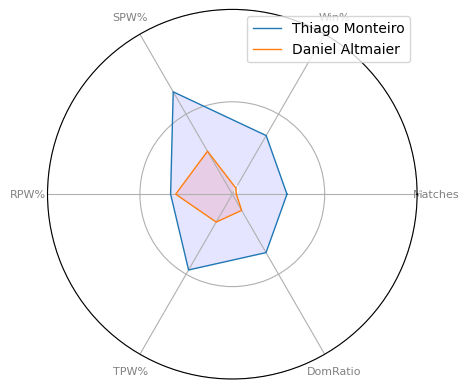

In [86]:
radar('Thiago Monteiro','Daniel Altmaier')

In [87]:
from ipywidgets import interact 
def myfunction(Player1,Player2): 
    return radar(Player1,Player2)
t = interact(myfunction, Player1=list(df_sklearn.Player),Player2=list(df_sklearn.Player))

interactive(children=(Dropdown(description='Player1', options=('Adrian Mannarino', 'Albert Ramos', 'Alejandro …

In [63]:
t

<function __main__.myfunction(x)>

In [72]:
import ipywidgets as ipy